### Linear Regression and Learning Curve challenges


##### Challenge 1

Generate (fake) data that is linearly related to `log(x)`.

You are making this model up. It is of the form `B0 + B1*log(x) + epsilon`. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:

 * quadratic (second degree polynomial)
 * logarithmic (`log(x)`)

(The second one should fit really well, since it has the same form as the underlying model!)


##### Challenge 2

Generate (fake) data from a model of the form `B0 + B1*x + B2*x^2 + epsilon`. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use `sklearn.metrics.mean_squared_error`.)


##### Challenge 3

For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

 * training error
 * test error
 * R squared
 * AIC


##### Challenge 4

For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.


Challenge 1

create y = b0 + b1*ln(x) + epsilon relationship

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression

In [2]:
X = np.linspace(1,2000,3000).reshape(-1,1)
epsilon = np.random.normal(loc = 0, scale = 0.5, size = 3000).reshape(-1,1)
constant = random.randint(1,100)                                                               

In [3]:
X = np.log(X)

In [4]:
y = constant + X + epsilon 

In [5]:
X.shape

(3000, 1)

In [6]:
m = LinearRegression()
m.fit(X,y)
m.score(X,y)

0.7916443746701828

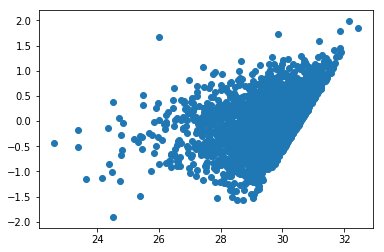

In [7]:
y_pred = m.predict(X)
plt.scatter(y,y - y_pred)

create x^2 and ln(x) features 

In [8]:
X = np.linspace(1,2000,3000).reshape(-1,1)
X_sq = X**2
X_ln = np.log(X)

0.43708612297123695


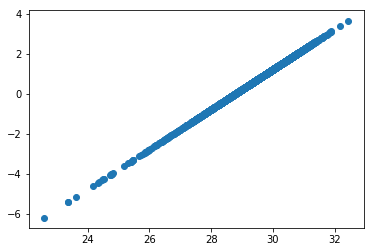

In [9]:
m = LinearRegression()
m.fit(X_sq,y)
print(m.score(X_sq,y))
y_pred = m.predict(X)
plt.scatter(y,y - y_pred)

0.7916443746701828


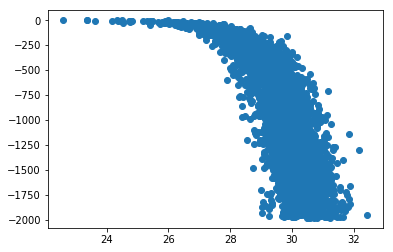

In [10]:
m2 = LinearRegression()
m2.fit(X_ln,y)
print(m2.score(X_ln,y))
y_pred = m2.predict(X)
plt.scatter(y,y - y_pred)

challenge 2 created

In [11]:
no_samples = 2000
X = np.linspace(1,2000,no_samples).reshape(-1,1)
std = 0.1
epsilon = np.random.normal(loc = 0, scale = std, size = no_samples).reshape(-1,1)
constant = random.randint(1,100)

In [12]:
X_sq = X**2

In [13]:
y = constant + X + X_sq + epsilon

create `B0 + B1*x + B2*x^2 + epsilon`

Create train/test split

In [14]:
X = np.concatenate([X,X_sq], axis = 1)

In [15]:
X

array([[1.000000e+00, 1.000000e+00],
       [2.000000e+00, 4.000000e+00],
       [3.000000e+00, 9.000000e+00],
       ...,
       [1.998000e+03, 3.992004e+06],
       [1.999000e+03, 3.996001e+06],
       [2.000000e+03, 4.000000e+06]])

In [16]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [21]:
from sklearn.metrics import mean_squared_error as mse

In [22]:
m.fit(X_train, y_train)
print(m.score(X_test,y_test))
y_pred_test = m.predict(X_test)
y_pred_train = m.predict(X_train)

0.9999999999999931


In [23]:
mse(y_train,y_pred_train)


0.010235057313517131

In [24]:
mse(y_test,y_pred_test)

0.01008842223979399

Only need X component now, Polynomial Features will do the rest

In [25]:
X_train_2 = X_train[:,[0]].reshape(-1,1)
X_test_2 = X_test[:,[0]].reshape(-1,1)

In [26]:
X_train_2

array([[1177.],
       [1129.],
       [ 185.],
       ...,
       [1726.],
       [ 207.],
       [ 868.]])

[1. 1. 1. 1. 1. 1. 1. 1.] [1. 1. 1. 1. 1. 1. 1. 1.]


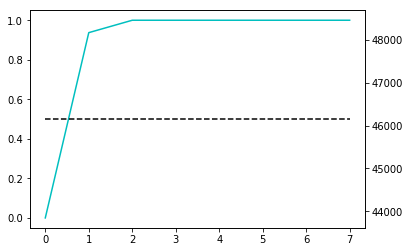

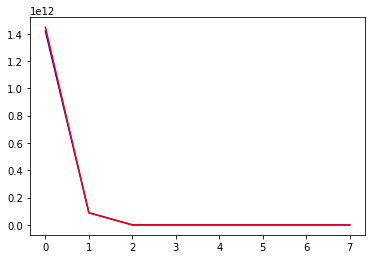

In [168]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import statsmodels.formula.api as sm
max_degree = 8
degree = np.ones(max_degree)
train_error = np.ones(max_degree)
test_error = np.ones(max_degree)
print(test_error, train_error)
r_sq = np.ones(max_degree)
aics= np.ones(max_degree)
for i in range(max_degree):
    model = make_pipeline(PolynomialFeatures(degree = i), m)
    model.fit(X_train_2, y_train)
    degree[i] = i
    train_error[i] = mse(y_train, model.predict(X_train_2))
    test_error[i] = mse(y_test,model.predict(X_test_2))
    r_sq[i] = model.score(X_train_2, y_train)
    aics[i] = sm.OLS(y_train, X_train_2).fit().aic
fig, ax1 = plt.subplots(1,1)
ax2 = ax1.twinx()

fig, ax3 = plt.subplots(1,1)

# plt.plot(degree, train_error)
# plt.plot(degree, test_error)
ax1.plot(degree, r_sq, label = 'R^2', color = 'c')
ax2.plot(degree, aics, linestyle = '--', color = 'black')
set_ylim = (45000, 47000) 
ax3.plot(degree, (train_error), linestyle = '-', color = 'blue')
ax3.plot(degree, (test_error), linestyle = '-', color = 'red')
# plt.plot(degree, aics)

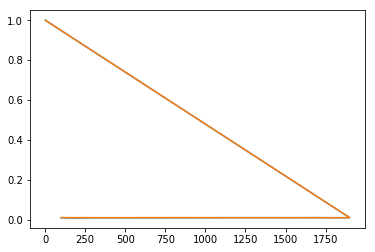

In [44]:
step_size = 100
train_error = np.ones(no_samples//step_size)
test_error = np.ones(no_samples//step_size)
sample = np.ones(no_samples//step_size)
for index, i in enumerate(range(step_size, no_samples, step_size)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-(i/no_samples), random_state = 5)
    m.fit(X_train,y_train)
    sample[index] = i
    train_error[index] = mse(y_train,m.predict(X_train))
    test_error[index] = mse(y_test,m.predict(X_test))
plt.plot(sample,train_error)
plt.plot(sample,test_error)